In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')
houseGLA = pd.DataFrame(houseData['GrLivArea'])
houseSP = pd.DataFrame(houseData['SalePrice'])

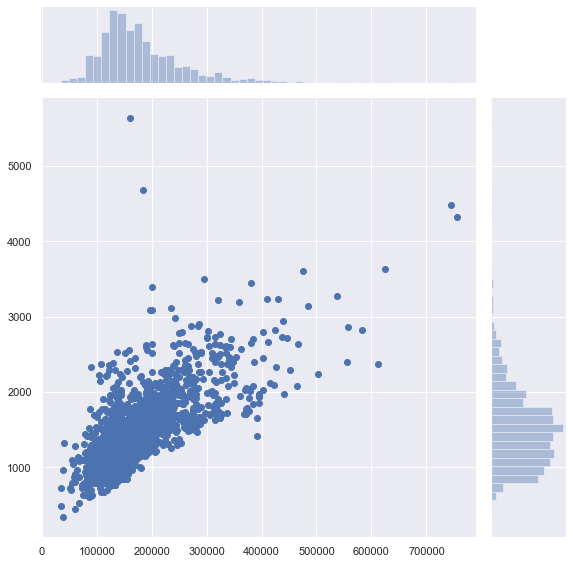

In [3]:
sb.jointplot(x = houseSP, y = houseGLA, height = 8)

In [4]:
jointDF = pd.concat([houseSP, houseGLA.reindex(index=houseSP.index)], sort = False, axis = 1)
jointDF.corr()

SalePrice  GrLivArea
SalePrice   1.000000   0.708624
GrLivArea   0.708624   1.000000

Intercept of Regression 	: b =  [678.27254598]
Coefficients of Regression 	: a =  [[0.00462975]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4907567443056968
Mean Squared Error (MSE) 	: 149588.20853480944

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5467793165922659
Mean Squared Error (MSE) 	: 100828.98238726245



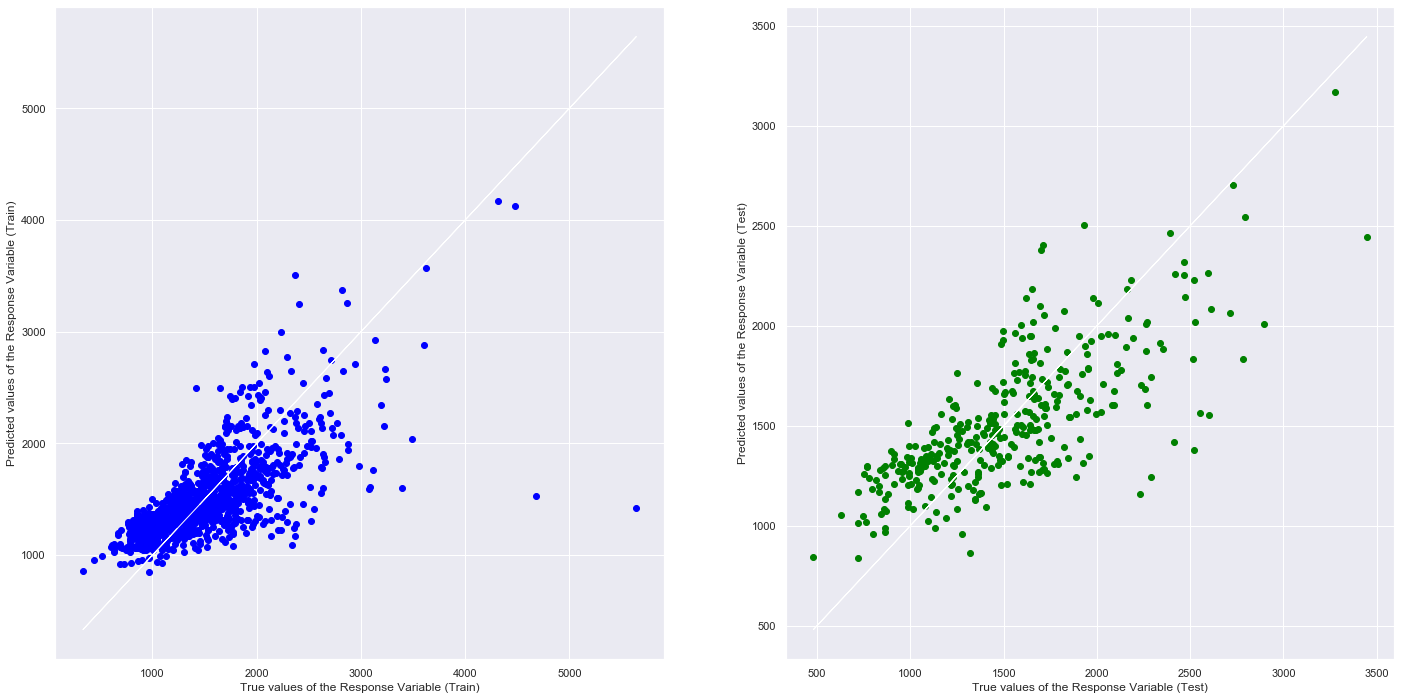

In [5]:

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseSP, houseGLA, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [6]:
SP_train,SP_test,GLA_train, GLA_test = train_test_split(houseSP, houseGLA, test_size = 0.25)

# Check the sample sizes
print("Train Set :", SP_train.shape, GLA_train.shape)
print("Test Set  :", SP_test.shape, GLA_test.shape)

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)


In [7]:
jointDF = pd.concat([SP_train, GLA_train.reindex(index=houseSP.index)], sort = False, axis = 1)
jointDF.corr()

SalePrice  GrLivArea
SalePrice   1.000000   0.707489
GrLivArea   0.707489   1.000000

In [8]:
main = pd.concat([houseSP, houseGLA.reindex(index=houseSP.index)], sort = False, axis = 1)
main.corr()

SalePrice  GrLivArea
SalePrice   1.000000   0.708624
GrLivArea   0.708624   1.000000

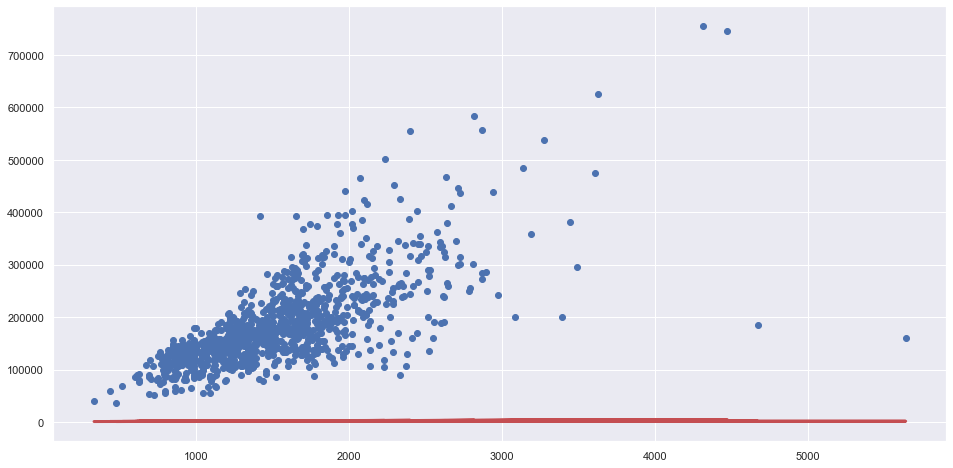

SalePrice  GrLivArea
SalePrice   1.000000   0.707489
GrLivArea   0.707489   1.000000

In [9]:
# Formula for the Regression line
regline_x = GLA_train
regline_y = linreg.intercept_ + linreg.coef_ * SP_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(GLA_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

jointDF = pd.concat([SP_train, GLA_train.reindex(index=houseSP.index)], sort = False, axis = 1)
jointDF.corr()


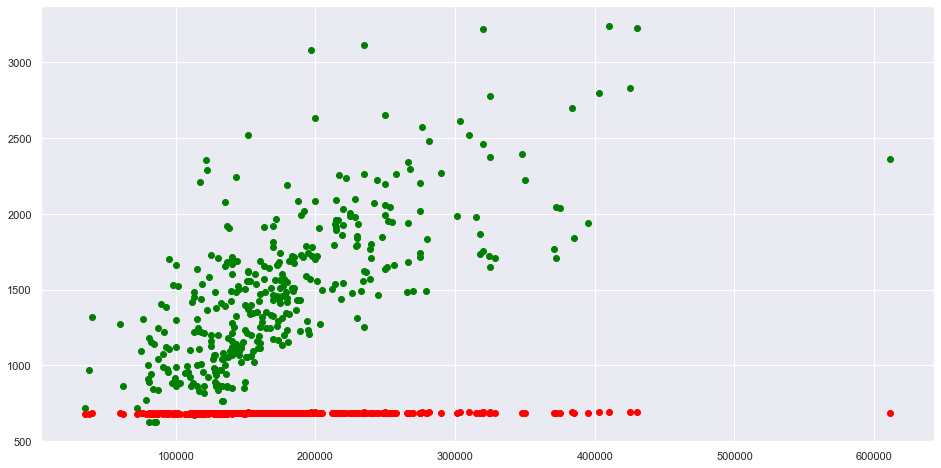

In [10]:
# Predict Total values corresponding to HP Test
SP_test_pred = linreg.predict(SP_test)
GLA_test_pred = linreg.predict(GLA_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(SP_test, GLA_test, color = "green")
plt.scatter(SP_test, GLA_test_pred, color = "red")
plt.show()

In [11]:
# Explained Variance (R^2)
print("Explained Variance (R^2) train \t:", linreg.score(GLA_train, SP_train))
# Explained Variance (R^2)
print("Explained Variance (R^2) test \t:", linreg.score(GLA_test, SP_test))

Explained Variance (R^2) train 	: -5.028395594795221
Explained Variance (R^2) test 	: -5.604206986434464


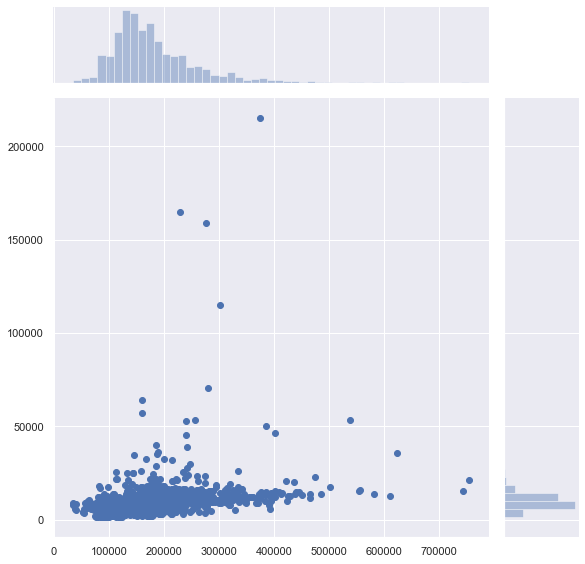

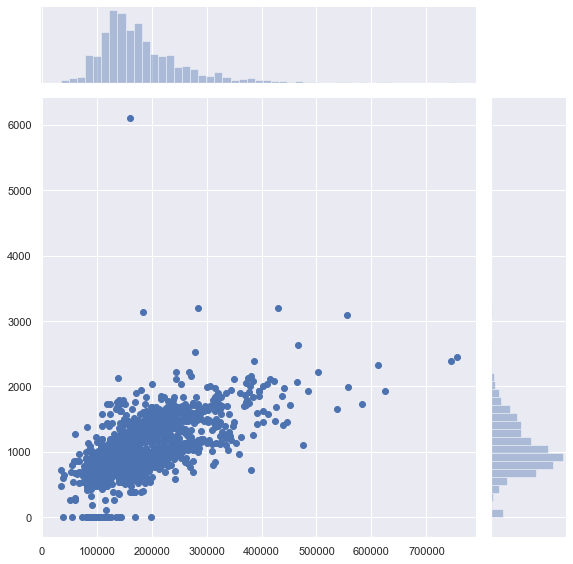

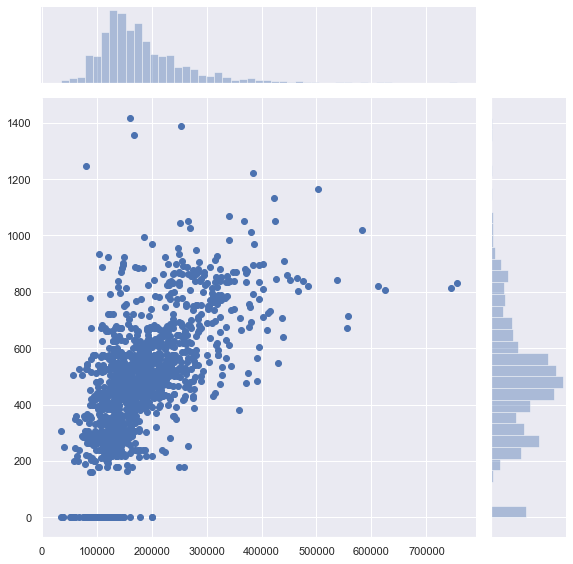

In [12]:
LA = pd.DataFrame(houseData['LotArea'])
TBSF = pd.DataFrame(houseData['TotalBsmtSF'])
GA = pd.DataFrame(houseData['GarageArea'])
REQ = [LA,TBSF,GA]

for i in REQ:
    sb.jointplot(x = houseSP, y = i,height = 8)

#sb.jointplot(x = houseSP, y = LA, height = 8)
#sb.jointplot(x = houseSP, y = TBSF, height = 8)
#sb.jointplot(x = houseSP, y = GA, height = 8)

In [13]:
SP_train,SP_test,LA_train, LA_test = train_test_split(houseSP, LA, test_size = 0.25)

# Check the sample sizes
print("Train Set :", SP_train.shape, LA_train.shape)
print("Test Set  :", SP_test.shape, LA_test.shape)

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)


In [14]:
SP_train,SP_test,TBSF_train, TBSF_test = train_test_split(houseSP, TBSF, test_size = 0.25)

# Check the sample sizes
print("Train Set :", SP_train.shape, TBSF_train.shape)
print("Test Set  :", SP_test.shape, TBSF_test.shape)

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)


In [15]:
SP_train,SP_test,GA_train, GA_test = train_test_split(houseSP, GA, test_size = 0.25)

# Check the sample sizes
print("Train Set :", SP_train.shape, GA_train.shape)
print("Test Set  :", SP_test.shape, GA_test.shape)

Train Set : (1095, 1) (1095, 1)
Test Set  : (365, 1) (365, 1)


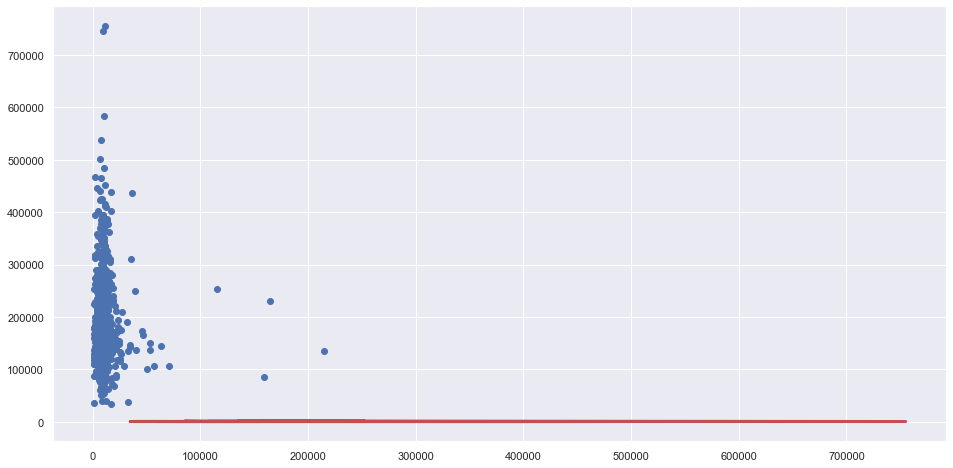

SalePrice   LotArea
SalePrice   1.000000  0.265336
LotArea     0.265336  1.000000

In [26]:
regline_x = SP_train
regline_y = linreg.intercept_ + linreg.coef_ * LA_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(LA_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

jointDF = pd.concat([SP_train, LA_train.reindex(index=houseSP.index)], sort = False, axis = 1)
jointDF.corr()

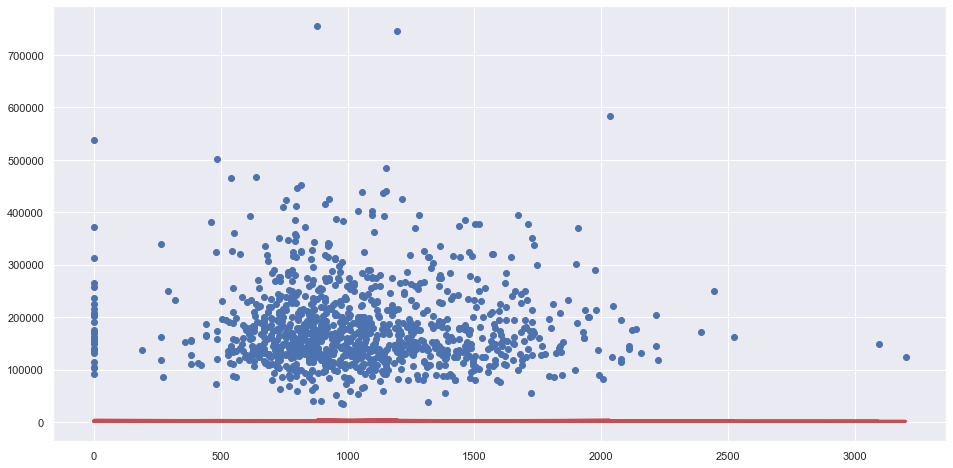

SalePrice  TotalBsmtSF
SalePrice     1.000000     0.638278
TotalBsmtSF   0.638278     1.000000

In [30]:
regline_x = TBSF_train
regline_y = linreg.intercept_ + linreg.coef_ * SP_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(TBSF_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

jointDF = pd.concat([SP_train, TBSF.reindex(index=houseSP.index)], sort = False, axis = 1)
jointDF.corr()

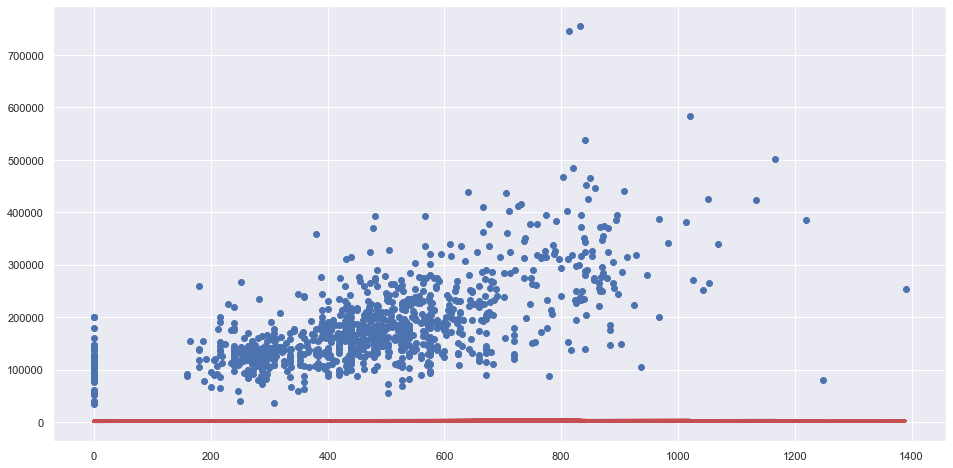

SalePrice  GarageArea
SalePrice    1.000000    0.643156
GarageArea   0.643156    1.000000

In [29]:
regline_x = GA_train
regline_y = linreg.intercept_ + linreg.coef_ * SP_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(GA_train, SP_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

jointDF = pd.concat([SP_train, GA_train.reindex(index=houseSP.index)], sort = False, axis = 1)
jointDF.corr()

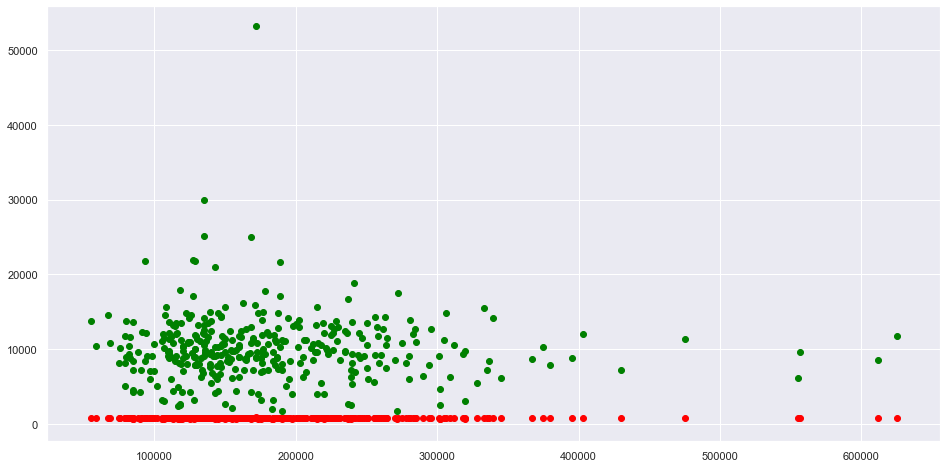

In [27]:
# Predict Total values corresponding to HP Test
LA_test_pred = linreg.predict(LA_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(SP_test, LA_test, color = "green")
plt.scatter(SP_test, LA_test_pred, color = "red")
plt.show()

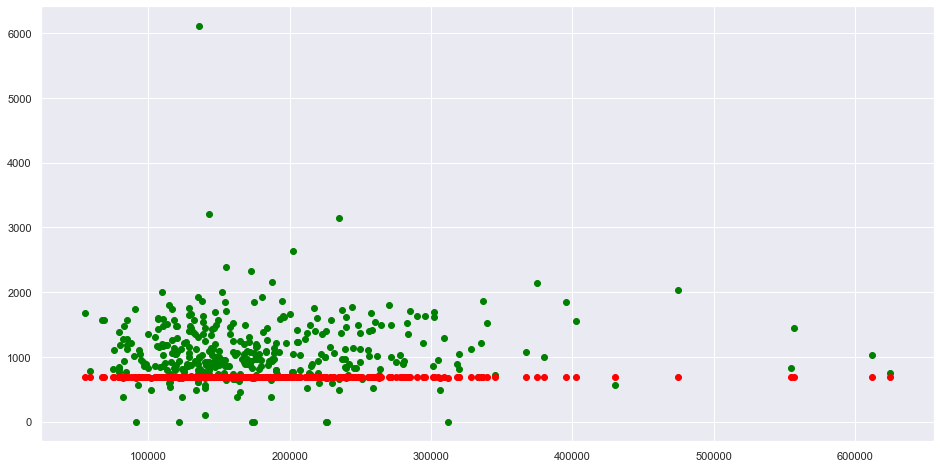

In [20]:
# Predict Total values corresponding to HP Test
TBSF_test_pred = linreg.predict(TBSF_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(SP_test, TBSF_test, color = "green")
plt.scatter(SP_test, TBSF_test_pred, color = "red")
plt.show()

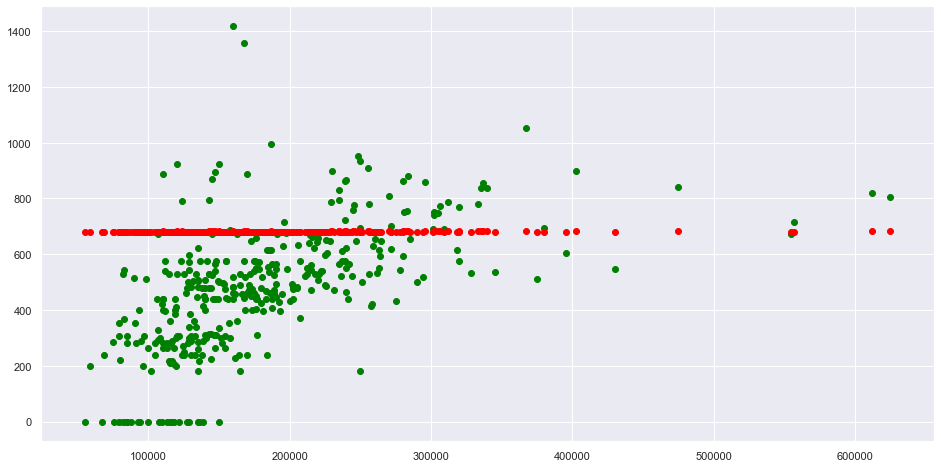

In [21]:
# Predict Total values corresponding to HP Test
GA_test_pred = linreg.predict(GA_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(SP_test, GA_test, color = "green")
plt.scatter(SP_test, GA_test_pred, color = "red")
plt.show()

In [22]:
# Explained Variance (R^2)
print("Explained Variance (R^2) train \t:", linreg.score(LA_train, SP_train))
# Explained Variance (R^2)
print("Explained Variance (R^2) test \t:", linreg.score(LA_test, SP_test))

Explained Variance (R^2) train 	: -5.221800743297113
Explained Variance (R^2) test 	: -4.939492575271836


In [23]:
# Explained Variance (R^2)
print("Explained Variance (R^2) train \t:", linreg.score(TBSF_train, SP_train))
# Explained Variance (R^2)
print("Explained Variance (R^2) test \t:", linreg.score(TBSF_test, SP_test))

Explained Variance (R^2) train 	: -5.224345386543256
Explained Variance (R^2) test 	: -4.9417553175555815


In [24]:
# Explained Variance (R^2)
print("Explained Variance (R^2) train \t:", linreg.score(GA_train, SP_train))
# Explained Variance (R^2)
print("Explained Variance (R^2) test \t:", linreg.score(GA_test, SP_test))

Explained Variance (R^2) train 	: -5.224480510513929
Explained Variance (R^2) test 	: -4.941904163196312


In [ ]:
# i would choose garage area's graph as it has better spread plot and goodness of fit with it's test and train data has
# the smallest difference